<a href="https://colab.research.google.com/github/monikabattula/Linear_regression/blob/master/Naviebayeasinn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [25]:
df = pd.read_csv('/content/cancer.csv')

In [26]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 32 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Id                         569 non-null    int64  
 1   Diagnosis                  569 non-null    object 
 2   Radius (mean)              569 non-null    float64
 3   Texture (mean)             569 non-null    float64
 4   Perimeter (mean)           569 non-null    float64
 5   Area (mean)                569 non-null    float64
 6   Smoothness (mean)          569 non-null    float64
 7   Compactness (mean)         569 non-null    float64
 8   Concavity (mean)           569 non-null    float64
 9   Concave points (mean)      569 non-null    float64
 10  Symmetry (mean)            569 non-null    float64
 11  Fractal dimension (mean)   569 non-null    float64
 12  Radius (se)                569 non-null    float64
 13  Texture (se)               569 non-null    float64

In [27]:
df.head()

,Id,Diagnosis,Radius (mean),Texture (mean),Perimeter (mean),Area (mean),Smoothness (mean),Compactness (mean),Concavity (mean),Concave points (mean),...,Radius (worst),Texture (worst),Perimeter (worst),Area (worst),Smoothness (worst),Compactness (worst),Concavity (worst),Concave points (worst),Symmetry (worst),Fractal dimension (worst)
0,8510426,B,13.540,14.36,87.46,566.3,0.09779,0.08129,0.06664,0.047810,...,15.110,19.26,99.70,711.2,0.14400,0.17730,0.23900,0.12880,0.2977,0.07259
1,8510653,B,13.080,15.71,85.63,520.0,0.10750,0.12700,0.04568,0.031100,...,14.500,20.49,96.09,630.5,0.13120,0.27760,0.18900,0.07283,0.3184,0.08183
2,8510824,B,9.504,12.44,60.34,273.9,0.10240,0.06492,0.02956,0.020760,...,10.230,15.66,65.13,314.9,0.13240,0.11480,0.08867,0.06227,0.2450,0.07773
3,854941,B,13.030,18.42,82.61,523.8,0.08983,0.03766,0.02562,0.029230,...,13.300,22.81,84.46,545.9,0.09701,0.04619,0.04833,0.05013,0.1987,0.06169
4,85713702,B,8.196,16.84,51.71,201.9,0.08600,0.05943,0.01588,0.005917,...,8.964,21.96,57.26,242.2,0.12970,0.13570,0.06880,0.02564,0.3105,0.07409


In [29]:
df = df.drop(["Id"], axis = 1)

In [32]:
M = df[df.Diagnosis == "M"]

In [33]:
B = df[df.Diagnosis == "B"]

AttributeError: 'DataFrame' object has no attribute 'radius_mean'

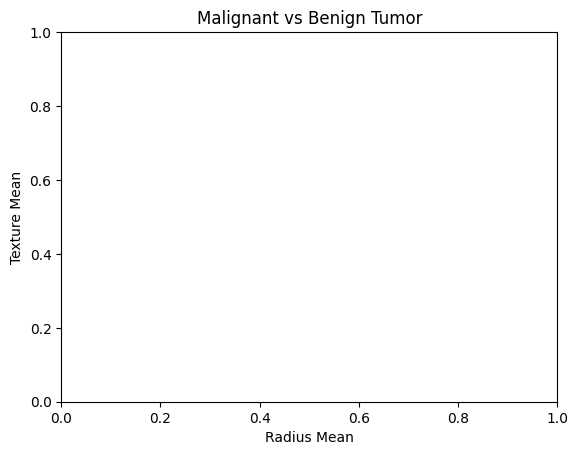

In [34]:
# plt.title("Malignant vs Benign Tumor")
# plt.xlabel("Radius Mean")
# plt.ylabel("Texture Mean")
# plt.scatter(M.radius_mean, M.texture_mean, color = "red", label = "Malignant", alpha = 0.3)
# plt.scatter(B.radius_mean, B.texture_mean, color = "lime", label = "Benign", alpha = 0.3)
# plt.legend()
# plt.show()

In [35]:
df.Diagnosis = [1 if i== "M" else 0 for i in df.Diagnosis]

In [39]:
x = df.drop(["Diagnosis"], axis = 1)
y = df.Diagnosis.values

In [22]:
x = (x - np.min(x)) / (np.max(x) - np.min(x))

/usr/local/lib/python3.10/dist-packages/numpy/core/fromnumeric.py:84: FutureWarning: In a future version, DataFrame.min(axis=None) will return a scalar min over the entire DataFrame. To retain the old behavior, use 'frame.min(axis=0)' or just 'frame.min()'
  return reduction(axis=axis, out=out, **passkwargs)
/usr/local/lib/python3.10/dist-packages/numpy/core/fromnumeric.py:84: FutureWarning: In a future version, DataFrame.max(axis=None) will return a scalar max over the entire DataFrame. To retain the old behavior, use 'frame.max(axis=0)' or just 'frame.max()'
  return reduction(axis=axis, out=out, **passkwargs)
/usr/local/lib/python3.10/dist-packages/numpy/core/fromnumeric.py:84: FutureWarning: In a future version, DataFrame.min(axis=None) will return a scalar min over the entire DataFrame. To retain the old behavior, use 'frame.min(axis=0)' or just 'frame.min()'
  return reduction(axis=axis, out=out, **passkwargs)


In [40]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3, random_state = 42)

In [41]:
from sklearn.naive_bayes import GaussianNB
nb = GaussianNB()
nb.fit(x_train, y_train)

GaussianNB()

In [53]:
from sklearn import datasets
from sklearn.metrics import pairwise_distances
import pandas as pd

# Load the breast cancer dataset
cancer = datasets.load_breast_cancer()
X = cancer.data

# Calculate Euclidean distances
euclidean_distances = pairwise_distances(X, metric='euclidean')

# Calculate Manhattan distances
manhattan_distances = pairwise_distances(X, metric='manhattan')

# Print the first few rows of the distances matrices
print("Euclidean Distances:")
print(pd.DataFrame(euclidean_distances).head())

print("\nManhattan Distances:")
print(pd.DataFrame(manhattan_distances).head())


Euclidean Distances:
           0            1            2            3            4    \
0     0.000000   341.730262   376.455765  1584.314017   538.023488   
1   341.730262     0.000000   276.776239  1679.237481   382.795583   
2   376.455765   276.776239     0.000000  1407.168980   164.154623   
3  1584.314017  1679.237481  1407.168980     0.000000  1362.107512   
4   538.023488   382.795583   164.154623  1362.107512     0.000000   

           5            6            7            8            9    ...  \
0  1389.461237   428.041734  1206.344557  1376.122054  1418.551504  ...   
1  1484.372654   452.707351  1298.444466  1462.135504  1510.249074  ...   
2  1213.292787   197.248779  1027.314355  1189.971505  1238.664506  ...   
3   196.469652  1229.306277   382.229366   217.960997   170.249652  ...   
4  1173.298394   262.785107   991.300084  1145.468906  1196.399397  ...   

           559          560          561          562          563  \
0  1666.031654  1380.823187  1704.568

In [55]:
//CHATGPT CODE HAVE TO UNDERSTAND AND MINIMIZE THE CODE
from sklearn.naive_bayes import BernoulliNB
import numpy as np

# Assuming x_train and y_train are your training data
# Create and fit the Bernoulli Naive Bayes model
bnb = BernoulliNB()
bnb.fit(x_train, y_train)

# Accessing the learned parameters
# Prior probabilities of the classes
class_priors = bnb.class_prior_

# Class log-likelihoods of the features
class_log_likelihoods = bnb.feature_log_prob_

# Class prior probabilities after smoothing
class_log_prior = np.log(bnb.class_prior_)

# Accessing model attributes
alpha_value = bnb.alpha  # Laplace smoothing parameter

# Print or use the obtained values as needed
print("Prior probabilities of classes:", class_priors)
print("Class log-likelihoods of features:", class_log_likelihoods)
print("Class prior probabilities after smoothing:", class_log_prior)
print("Laplace smoothing parameter (alpha):", alpha_value)


AttributeError: 'DataFrame' object has no attribute 'class_prior_'

In [42]:
print("Naive Bayes score: ",nb.score(x_test, y_test))

Naive Bayes score:  0.9064327485380117
